In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [2]:
#Load Dataset
df = pd.read_csv("/content/AUTISM_GENE.csv")
df.head()
df.tail()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
1018,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4
1020,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1
1021,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3
1022,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,3.0,0,4


In [3]:
#Check for Null Values
print("Null values in each column:\n")
print(df.isnull().sum())


Null values in each column:

status                0
gene-symbol           0
gene-name             1
ensembl-id           13
chromosome            0
genetic-category      2
gene-score           81
syndromic             0
number-of-reports     0
dtype: int64


In [4]:
df.describe()

,status,gene-score,syndromic,number-of-reports
count,1023.0,942.000000,1023.000000,1023.000000
mean,9.0,2.326964,0.224829,8.608993
std,0.0,0.812558,0.417674,10.931901
min,9.0,1.000000,0.000000,1.000000
25%,9.0,2.000000,0.000000,3.000000
50%,9.0,3.000000,0.000000,5.000000
75%,9.0,3.000000,0.000000,9.000000
max,9.0,3.000000,1.000000,94.000000


In [5]:
df['genetic-category'].mode()

,genetic-category
0,Rare Single Gene Mutation


In [6]:
#Fill Missing Values
# Fill missing numeric values with mean
df['gene-score'] = df['gene-score'].fillna(df['gene-score'].mean())

# Fill missing categorical values with mode
df['gene-name'] = df['gene-name'].fillna(df['gene-name'].mode()[0])
df['genetic-category'] = df['genetic-category'].fillna(df['genetic-category'].mode()[0])
df['ensembl-id'] = df['ensembl-id'].fillna("Unknown")

# Drop rows where target (syndromic) is missing
df = df[df['syndromic'].notna()]


In [7]:
print(df.isnull().sum())

status               0
gene-symbol          0
gene-name            0
ensembl-id           0
chromosome           0
genetic-category     0
gene-score           0
syndromic            0
number-of-reports    0
dtype: int64


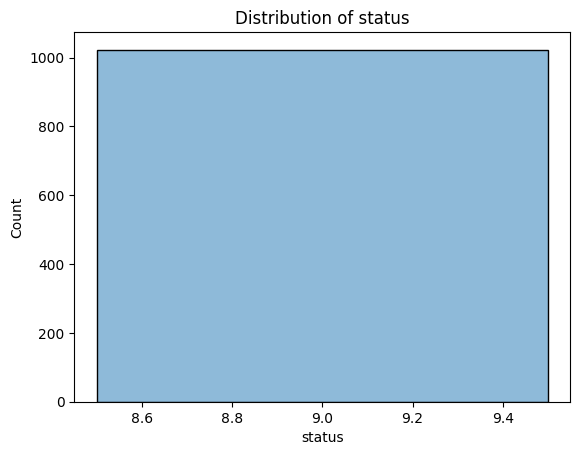

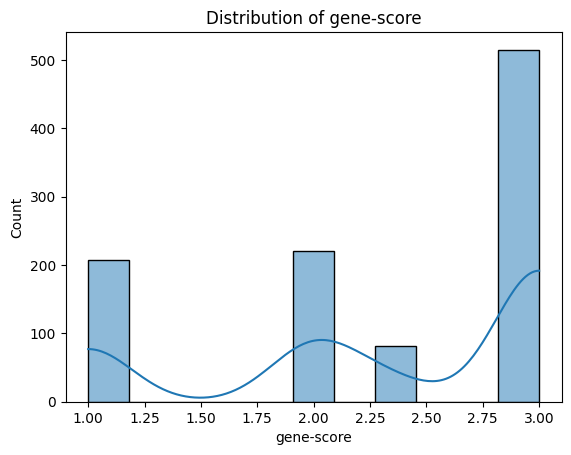

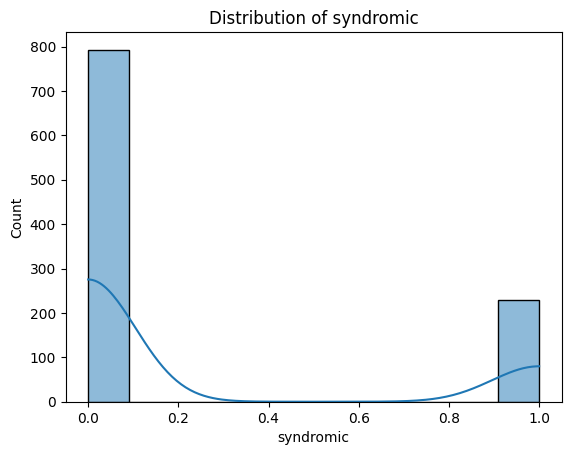

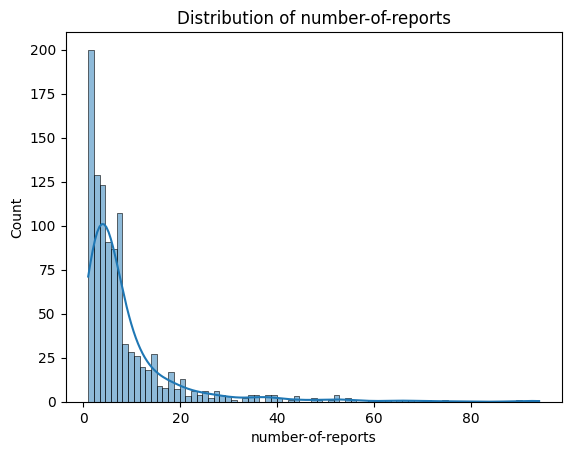

In [8]:
#Univariate Analysis
num_cols = ['status', 'gene-score', 'syndromic', 'number-of-reports']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


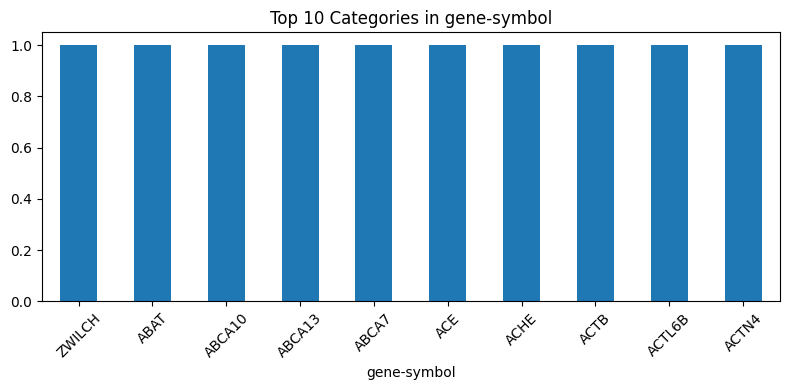

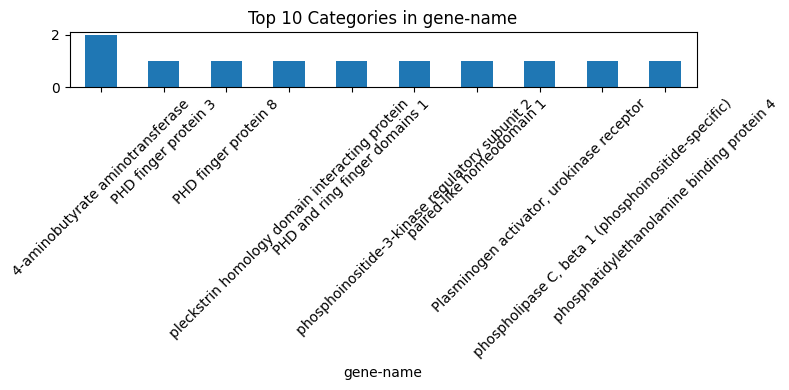

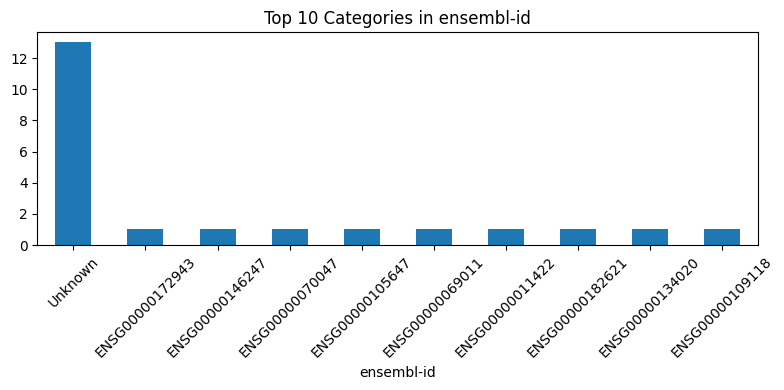

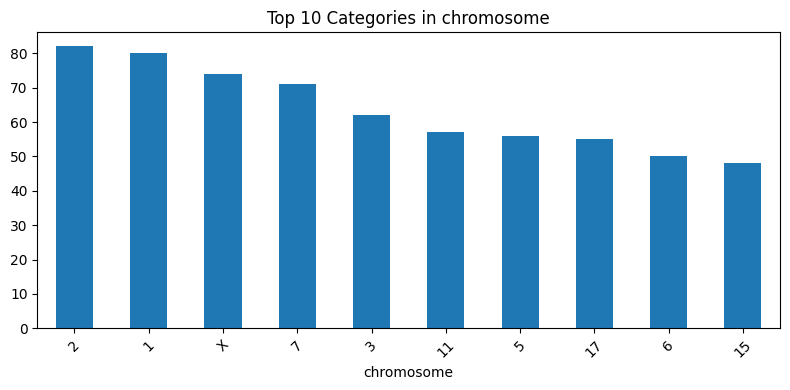

/tmp/ipython-input-2886692994.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


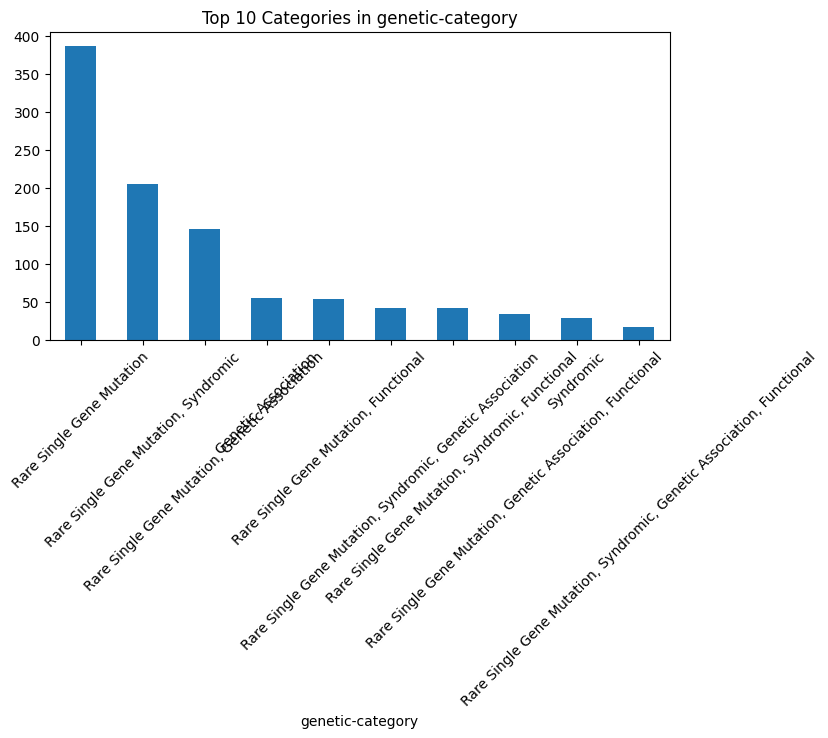

In [9]:
# Categorical Columns
cat_cols = ['gene-symbol', 'gene-name', 'ensembl-id', 'chromosome', 'genetic-category']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Categories in {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


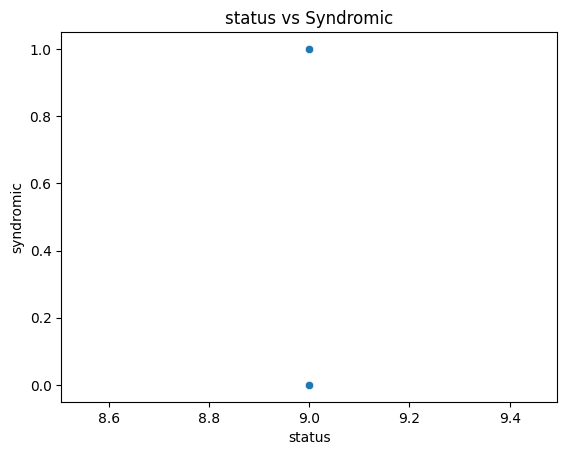

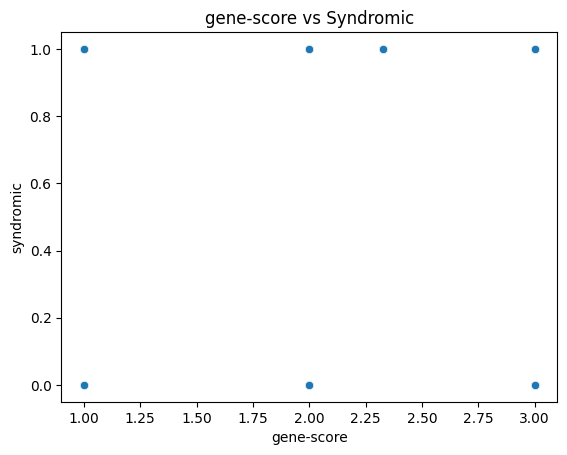

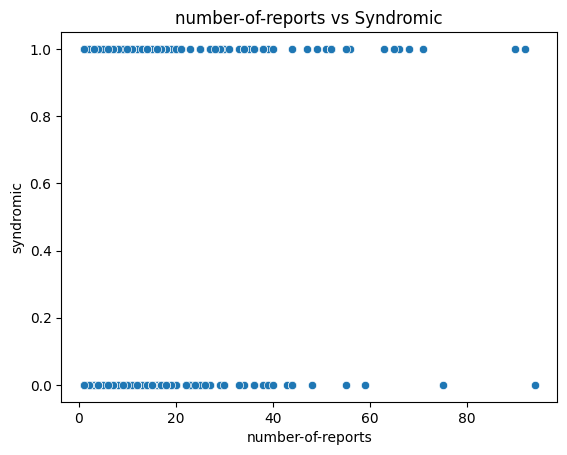

In [10]:
#Bivariate Analysis
for col in num_cols:
    if col != 'syndromic':
        plt.figure()
        sns.scatterplot(data=df, x=col, y='syndromic')
        plt.title(f'{col} vs Syndromic')
        plt.show()


In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [12]:
df.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,0,0,835,7,5,3.0,0,5
1,9,1,14,581,8,3,3.0,0,1
2,9,2,13,806,19,4,3.0,0,6
3,9,3,15,59,10,3,3.0,0,4
4,9,4,463,631,8,5,3.0,0,3


In [13]:
df['genetic-category'].value_counts()

,count
genetic-category,
3,386
7,204
5,145
1,55
4,53
9,42
8,41
6,34
11,28


In [14]:
df.shape

(1023, 9)

In [15]:
df.columns

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')

In [16]:
df['number-of-reports'].nunique()

57

In [17]:
df['ensembl-id'].nunique()

1011

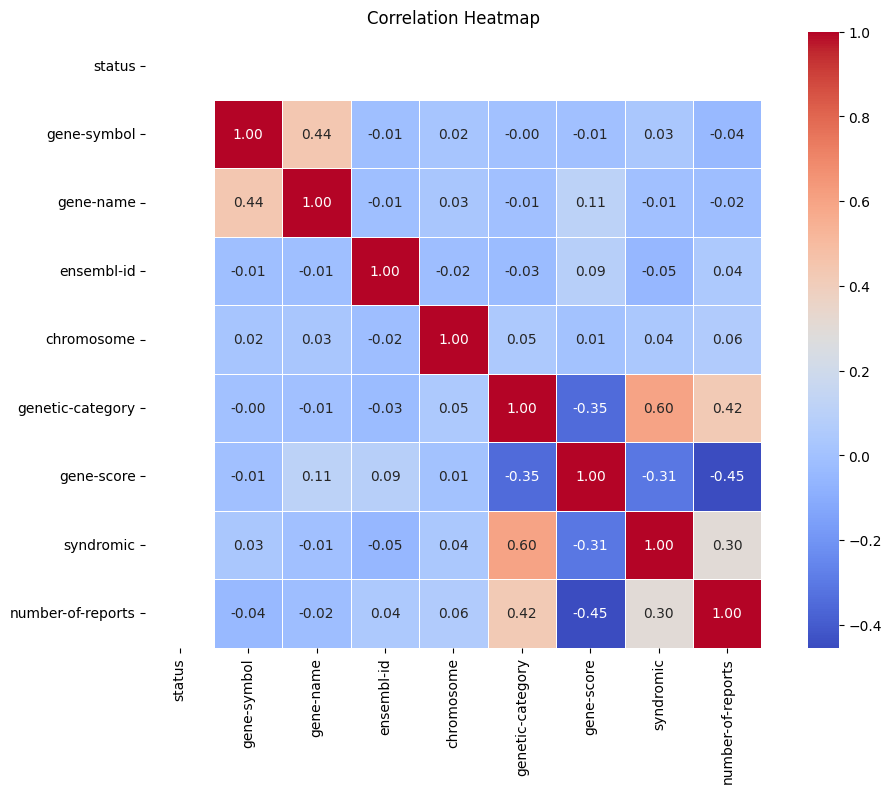

In [18]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Selecting features with moderate correlation
selected_features = ['genetic-category', 'number-of-reports', 'gene-score']
X = df[selected_features]
y = df['syndromic']


In [20]:
df.shape

(1023, 9)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.2)

# Predict & evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5974 - loss: 0.8901 - val_accuracy: 0.8354 - val_loss: 0.4782
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7746 - loss: 0.5925 - val_accuracy: 0.8171 - val_loss: 0.3903
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7715 - loss: 0.5642 - val_accuracy: 0.7805 - val_loss: 0.3797
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8133 - loss: 0.4292 - val_accuracy: 0.7561 - val_loss: 0.4131
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8141 - loss: 0.4145 - val_accuracy: 0.8049 - val_loss: 0.3410
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7815 - loss: 0.4565 - val_accuracy: 0.8354 - val_loss: 0.3658
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8063 - loss: 0.4230 - val_accuracy: 0.8171 - val_loss: 0.3750
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8236 - loss: 0.3919 - val_accuracy: 0.8110 - val_loss

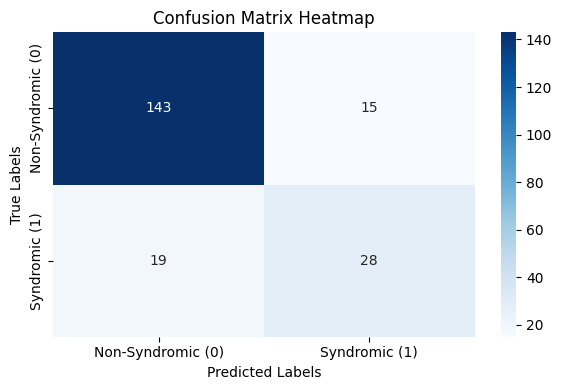

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert predictions and true labels to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Syndromic (0)', 'Syndromic (1)'],
            yticklabels=['Non-Syndromic (0)', 'Syndromic (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


In [23]:
import random
import numpy as np

# Pick a random index from the dataset
random_index = random.randint(129, len(df) - 1)

# Select features for the sample
sample = df[selected_features].iloc[[random_index]]
sample_array = sample.to_numpy()

# Predict using the CNN model
prediction_prob = model.predict(sample_array)
prediction = np.argmax(prediction_prob, axis=1)[0]

# Print result
print(f"Sample Index: {random_index}")
print("Sample Input:\n", sample)
print("Prediction:", prediction)

# Optional: Human-readable format
result = "🟢 Syndromic (1)" if prediction == 1 else "🔵 Non-Syndromic (0)"
print("Prediction Result:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Sample Index: 873
Sample Input:
      genetic-category  number-of-reports  gene-score
873                 3                  6         2.0
Prediction: 0
Prediction Result: 🔵 Non-Syndromic (0)


In [24]:
pip install gradio scikit-learn pandas


In [25]:
import gradio as gr
import pandas as pd
import numpy as np

def predict_syndrome(genetic_category, number_of_reports, gene_score):
    # Prepare input as a DataFrame
    input_data = pd.DataFrame([[
        genetic_category, number_of_reports, gene_score
    ]], columns=['genetic-category', 'number-of-reports', 'gene-score'])

    # Convert to NumPy array for Keras model
    input_array = input_data.to_numpy()

    # Predict with CNN model
    prediction_prob = model.predict(input_array)
    prediction = np.argmax(prediction_prob, axis=1)[0]

    # Format result
    result = "🟢 Syndromic (1)" if prediction == 1 else "🔵 Non-Syndromic (0)"
    return f"**Prediction Result:** {result}"

# Build Gradio interface
iface = gr.Interface(
    fn=predict_syndrome,
    inputs=[
        gr.Number(label="Genetic Category (encoded)"),
        gr.Number(label="Number of Reports"),
        gr.Slider(0.0, 1.0, step=0.01, label="Gene Score")
    ],
    outputs=gr.Markdown(label="Prediction"),
    title="🧬 Autism Syndrome Classification",
    description="Predicts whether a gene report is Syndromic or Non-Syndromic using a Deep Learning CNN Model."
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://54ca241cd83ed91204.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
